### In this Experiment we would experiment adding extra polynomial feature and its impact on feature selection 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn import cross_validation,linear_model,preprocessing,feature_selection
import seaborn as sns


In [18]:
# Generating the data
X = np.linspace(1,10 ,100)
X
epsilon = np.random.normal(0,1,100)
X_2 = X**2
X_3 = X**3
beta_0 = .3
beta_1 = .80
beta_2 = .3
beta_3 = .15

y = beta_0 + beta_1*X+beta_2*X_2+beta_3*X_3

# creating a DataFrame
df = pd.DataFrame({'X':X,'X_2':X_2,'X_3':X_3,'y':y})

In [19]:
df.head()

,X,X_2,X_3,y
0,1.000000,1.000000,1.000000,1.550000
1,1.090909,1.190083,1.298272,1.724493
2,1.181818,1.396694,1.650639,1.912059
3,1.272727,1.619835,2.061608,2.113373
4,1.363636,1.859504,2.535687,2.329113


#### Exploratory Data Analysis:


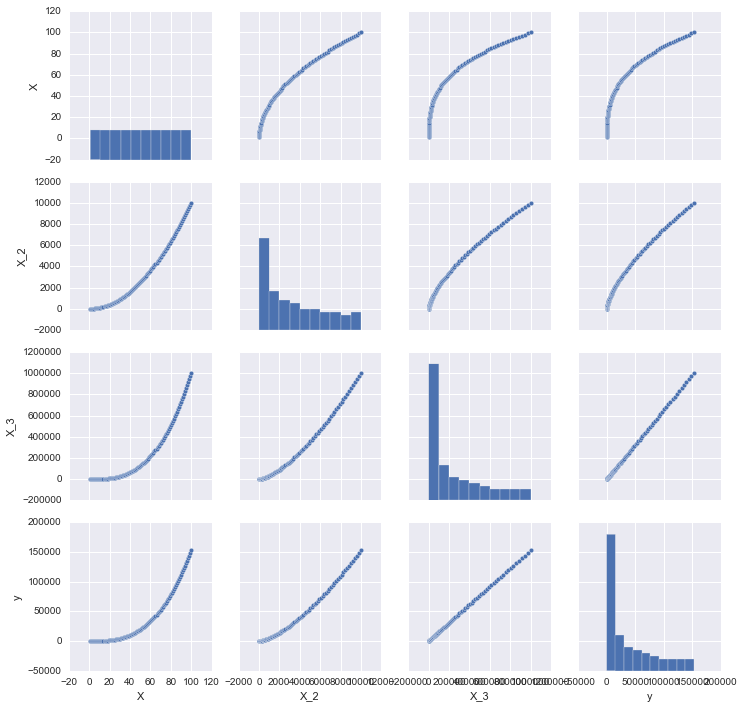

In [14]:
sns.pairplot(data = df)

In [20]:
# Generating extra polynomial features
df['X_4'] = df.X**4
df['X_5'] = df.X**5
df['X_6'] = df.X**6
df['X_7'] = df.X**7
df['X_8'] = df.X**8
df['X_9'] = df.X**9
df['X_10'] = df.X**10


- y is a cubic function of X 

In [70]:
df.corr()

,X,X_2,X_3,y,X_4,X_5,X_6,X_7,X_8,X_9,X_10
X,1.000000,0.977991,0.935075,0.948118,0.889266,0.846264,0.807395,0.772625,0.741538,0.713652,0.688523
X_2,0.977991,1.000000,0.987740,0.993075,0.962151,0.932388,0.902214,0.873147,0.845752,0.820185,0.796415
X_3,0.935075,0.987740,1.000000,0.999235,0.992612,0.976139,0.955685,0.933770,0.911671,0.890034,0.869182
y,0.948118,0.993075,0.999235,1.000000,0.987355,0.967620,0.944786,0.921122,0.897726,0.875123,0.853550
X_4,0.889266,0.962151,0.992612,0.987355,1.000000,0.995151,0.983782,0.968982,0.952479,0.935266,0.917925
X_5,0.846264,0.932388,0.976139,0.967620,0.995151,1.000000,0.996595,0.988311,0.977144,0.964316,0.950589
X_6,0.807395,0.902214,0.955685,0.944786,0.983782,0.996595,1.000000,0.997484,0.991191,0.982482,0.972243
X_7,0.772625,0.873147,0.933770,0.921122,0.968982,0.988311,0.997484,1.000000,0.998068,0.993130,0.986154
X_8,0.741538,0.845752,0.911671,0.897726,0.952479,0.977144,0.991191,0.998068,1.000000,0.998471,0.994496
X_9,0.713652,0.820185,0.890034,0.875123,0.935266,0.964316,0.982482,0.993130,0.998471,1.000000,0.998760


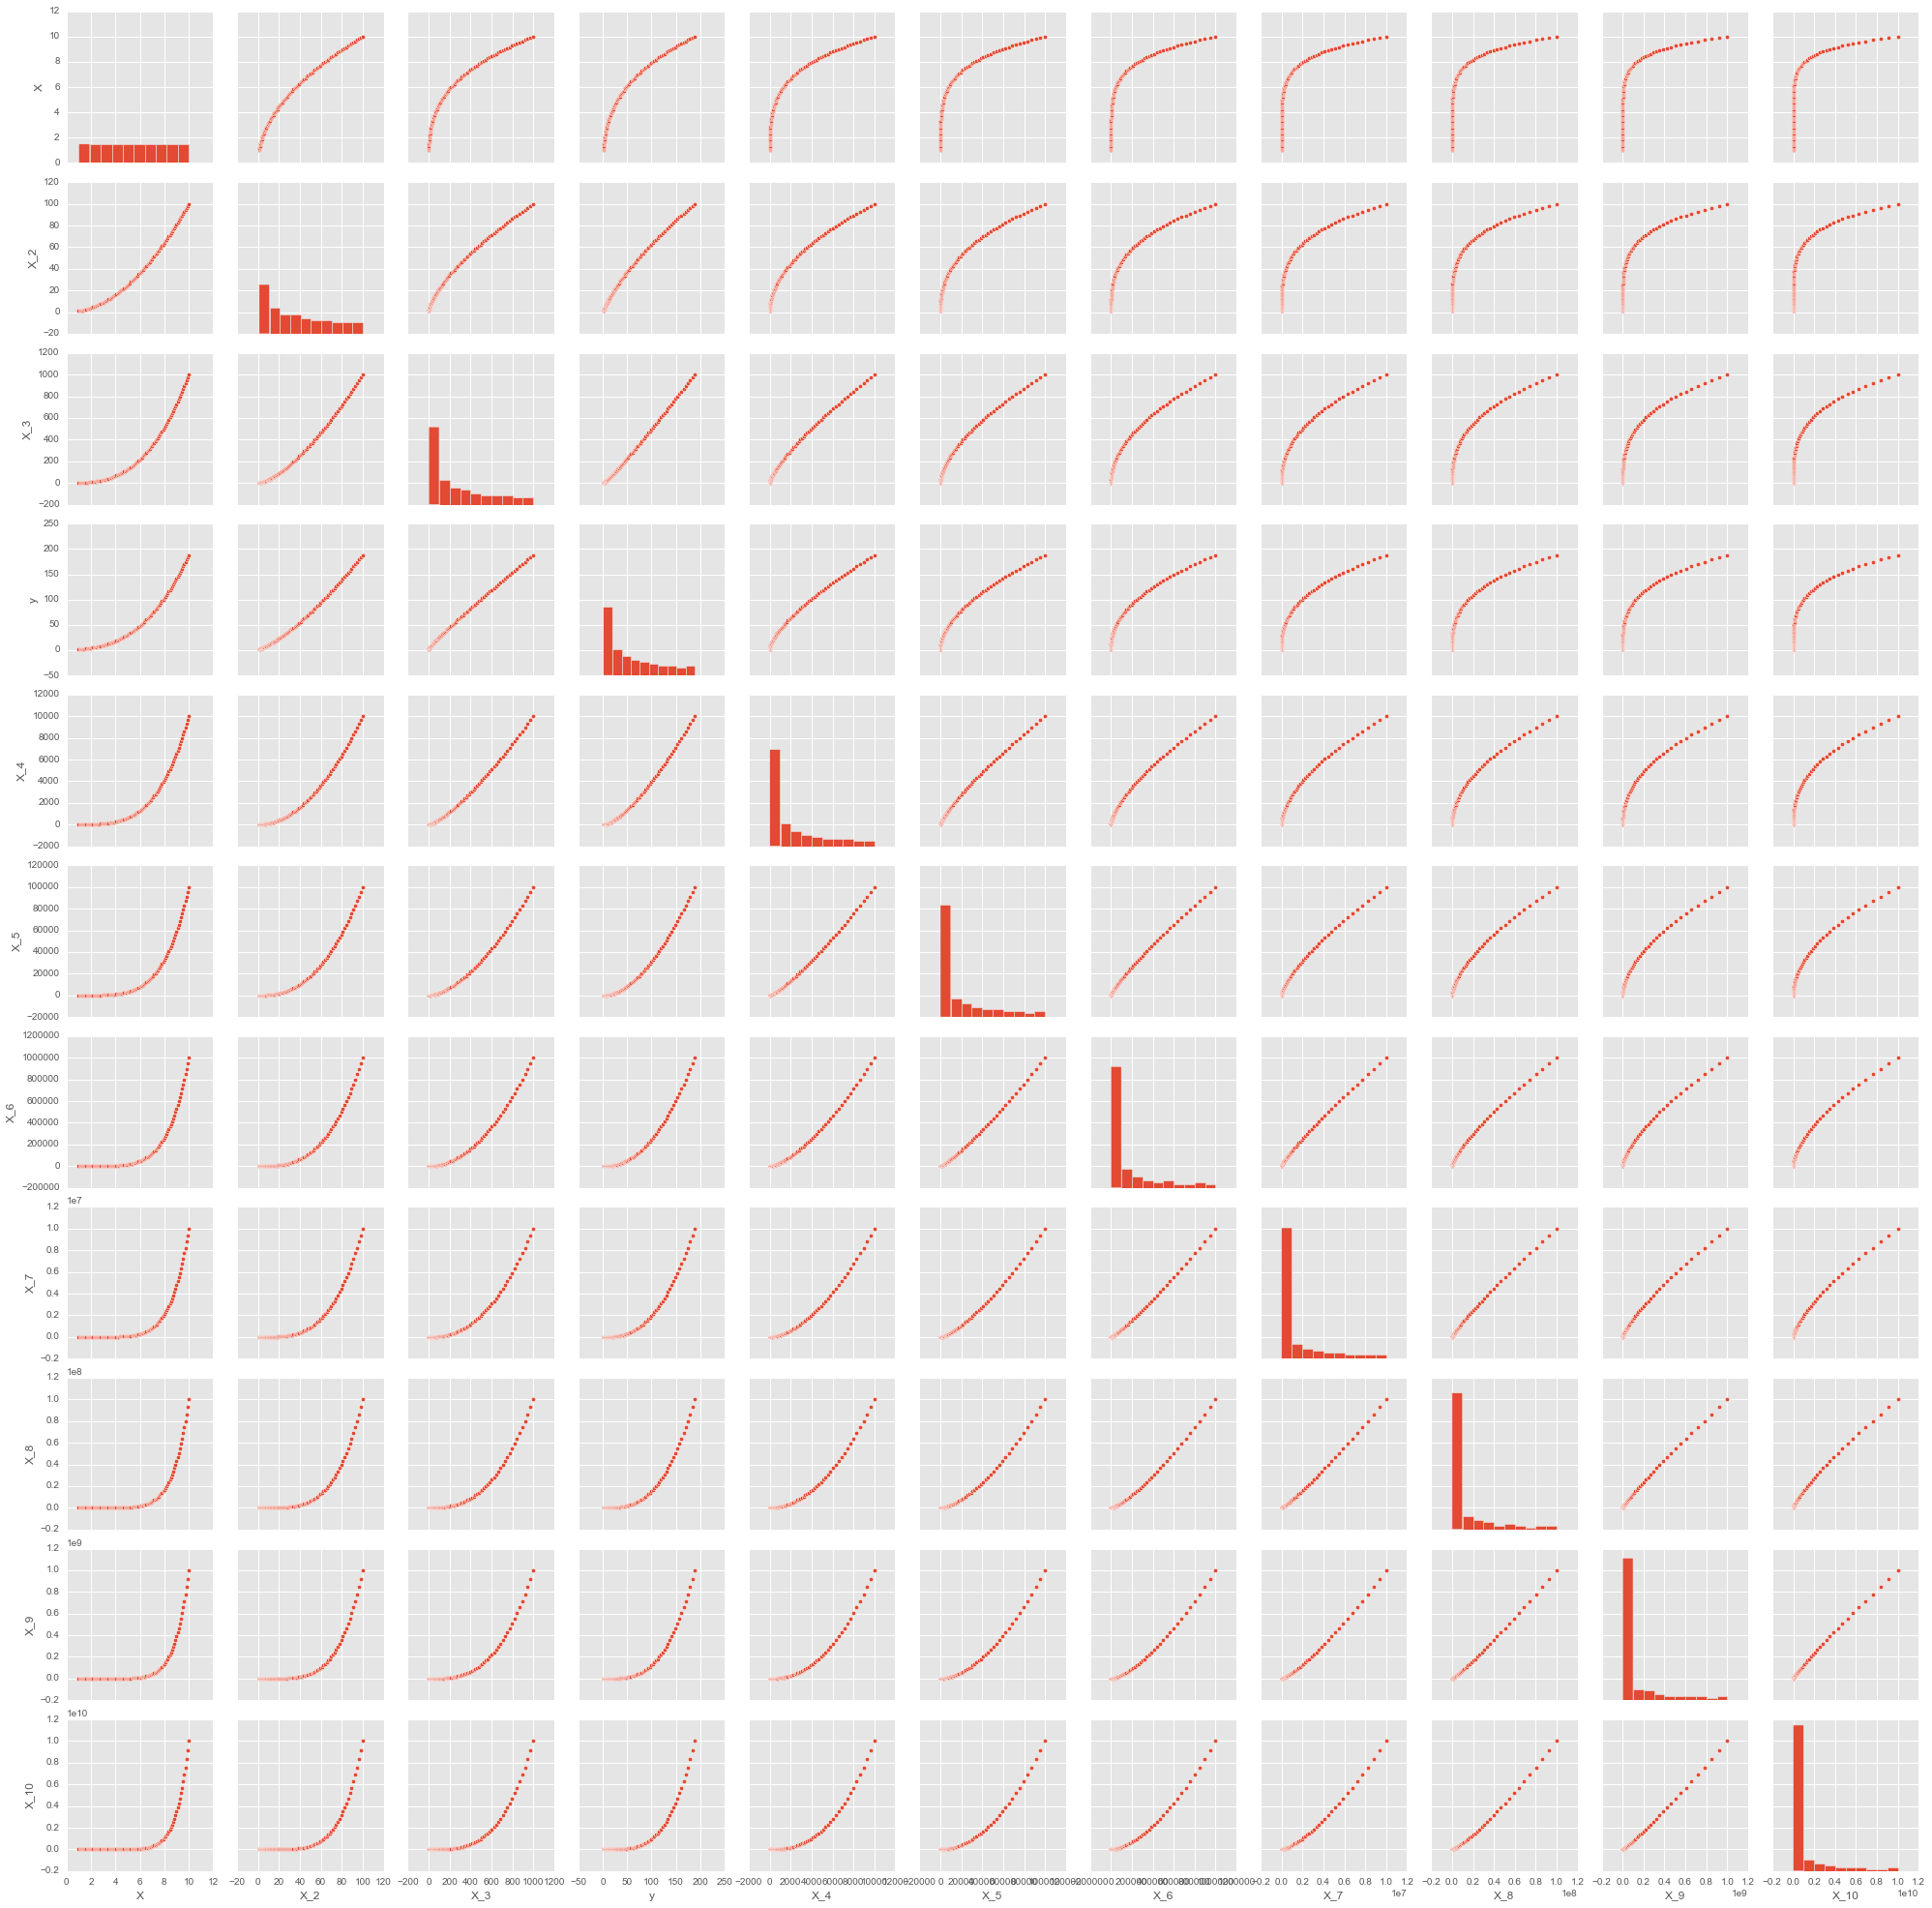

In [71]:
sns.pairplot(data=df)

In [22]:
X = df.drop(['y'],axis =1)
y= df.y

In [23]:
train_X,test_X,train_y,test_y = cross_validation.train_test_split(X,y,test_size = .2)

In [63]:

#df_eval_coeff = pd.DataFrame({'Train_score':np.nan,'cv_score':np.nan,'k':np.nan},index=[0])


In [133]:
# The code below loops through the no of columns and performs the K-best feature selection:
# creating a data frame to hold the result
df_eval_kbest = pd.DataFrame({'Train_score':np.nan,'cv_score':np.nan,'k':np.nan,'coeff':np.nan},index=[0])

from sklearn.feature_selection import f_regression
for i in range(1,len(train_X.columns)):
    feature_list = []  # Empty list to hold the coefficients selected
    k_best = feature_selection.SelectKBest(score_func =f_regression , k=i).fit(train_X,train_y)
    k_val = k_best.get_support(indices = True) # Getting the indices for the selected columns
    
    # populating the list with the columns selected
    for j in range(0,i):
        temp = k_val[j]
        feature_list.append(train_X.columns[temp])
        feature_list.append(',')
    
    print feature_list
        
    # selecting the feature space
    X_new = k_best.fit_transform(train_X,train_y)
    
    #modeling
    model_k = linear_model.LinearRegression().fit(X_new, train_y)
    train_score = model_k.score(X_new, train_y)
    cv_score = cross_validation.cross_val_score(model_k,X_new,train_y,cv=10).mean()
    
    # populating the DataFrame
    
    df_eval_kbest.loc[i-1,'Train_score'] = train_score
    df_eval_kbest.loc[i-1,'cv_score'] = cv_score
    df_eval_kbest.loc[i-1,'coeff'] = " ".join(str(x) for x in feature_list)
    df_eval_kbest.loc[i-1,'k'] = i
    
    
    

['X_3', ',']
['X_2', ',', 'X_3', ',']
['X_2', ',', 'X_3', ',', 'X_4', ',']
['X_2', ',', 'X_3', ',', 'X_4', ',', 'X_5', ',']
['X', ',', 'X_2', ',', 'X_3', ',', 'X_4', ',', 'X_5', ',']
['X', ',', 'X_2', ',', 'X_3', ',', 'X_4', ',', 'X_5', ',', 'X_6', ',']
['X', ',', 'X_2', ',', 'X_3', ',', 'X_4', ',', 'X_5', ',', 'X_6', ',', 'X_7', ',']
['X', ',', 'X_2', ',', 'X_3', ',', 'X_4', ',', 'X_5', ',', 'X_6', ',', 'X_7', ',', 'X_8', ',']
['X', ',', 'X_2', ',', 'X_3', ',', 'X_4', ',', 'X_5', ',', 'X_6', ',', 'X_7', ',', 'X_8', ',', 'X_9', ',']


In [131]:
df_eval_kbest

,Train_score,coeff,cv_score,k
0,0.998429,"X_3 ,",0.996943,1.0
1,0.999993,"X_2 , X_3 ,",0.999988,2.0
2,0.999999,"X_2 , X_3 , X_4 ,",0.999998,3.0
3,1.000000,"X_2 , X_3 , X_4 , X_5 ,",1.000000,4.0
4,1.000000,"X , X_2 , X_3 , X_4 , X_5 ,",1.000000,5.0
5,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 ,",1.000000,6.0
6,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 ,",1.000000,7.0
7,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 , X_8 ,",1.000000,8.0
8,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 , X_8 , ...",1.000000,9.0


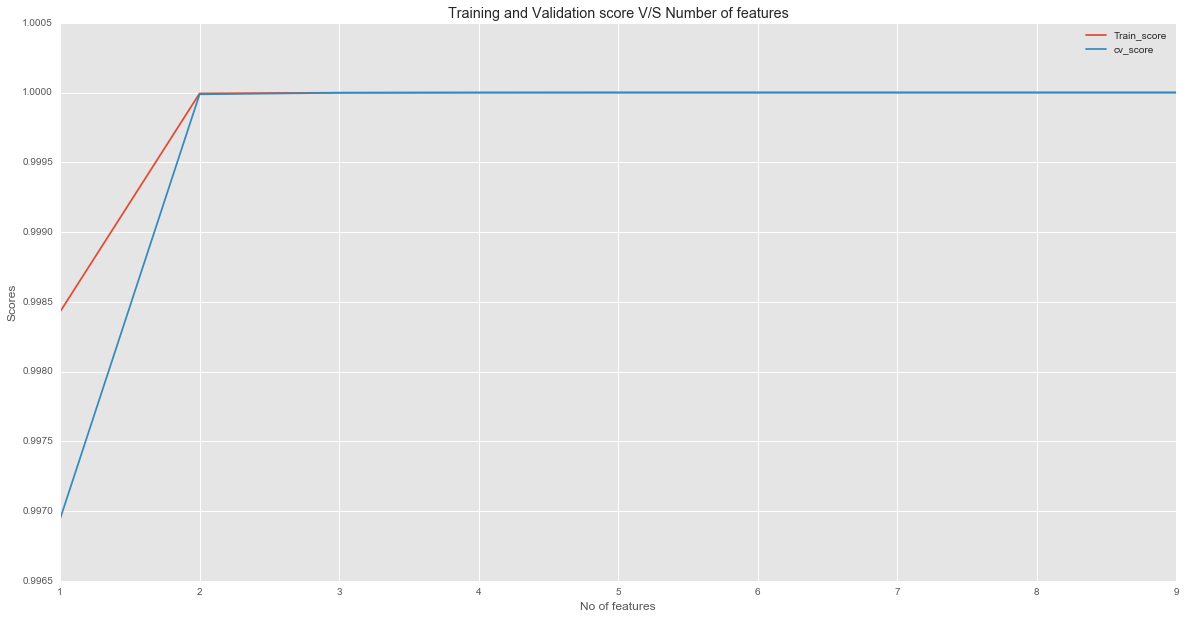

In [79]:
plt.figure(figsize=(20,10))
plt.plot(df_eval_kbest.k , df_eval_kbest.Train_score,label='Train_score')

plt.plot(df_eval_kbest.k , df_eval_kbest.cv_score,label='cv_score')
plt.legend(loc='best')
plt.xlabel('No of features')
plt.ylabel('Scores')
plt.title('Training and Validation score V/S Number of features')


### Observations:
- Appears that most of the varation in y is being captured by the model that has 3 predictors
- This trend is expected due to the following reasons
    - There is a High degree of collineraity in the data set
    - The coefficients chosen are (beta_0 = .3,beta_1 = .80,beta_2 = .3,beta_3 = .15) and accordingly our algorithm has picked the best subset

## *************    Recursive Feature Elimination****************** 
        

In [88]:
from sklearn.feature_selection import RFE

#Data frame to hold the values of features
df_eval_RFE = pd.DataFrame({'Train_score':np.nan,'cv_score':np.nan,'k':np.nan,'coeff':np.nan},index=[0])
# estimator instance 
estimator = linear_model.LinearRegression()
for i in range(0,len(train_X.columns)):
    feature_list = []   # list to store the features
    model_RFE = RFE(estimator,i+1,1).fit(train_X,train_y)
    features = model_RFE.get_support(indices = True)
    train_score = model_RFE.score(train_X,train_y)
    cv_score = cross_validation.cross_val_score(model_RFE,train_X,train_y,cv=10).mean()
    
    #this loop would populate teh feature list
    for j in range(0,i+1):
        col = features[j]
        feature_list.append(train_X.columns[col])
        feature_list.append(',')
    
    #populating the dataframe
    df_eval_RFE.loc[i , 'Train_score'] = train_score
    df_eval_RFE.loc[i , 'cv_score'] = cv_score
    df_eval_RFE.loc[i , 'k'] = i+1
    df_eval_RFE.loc[i , 'coeff'] = " ".join(str(x) for x in feature_list)
    
    
    
    


In [89]:
df_eval_RFE

,Train_score,coeff,cv_score,k
0,0.893620,"X ,",0.812398,1.0
1,0.998369,"X , X_2 ,",0.996951,2.0
2,1.000000,"X , X_2 , X_3 ,",1.000000,3.0
3,1.000000,"X , X_2 , X_3 , X_5 ,",1.000000,4.0
4,1.000000,"X , X_2 , X_3 , X_4 , X_5 ,",1.000000,5.0
5,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 ,",1.000000,6.0
6,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 ,",1.000000,7.0
7,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 , X_8 ,",1.000000,8.0
8,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 , X_8 , ...",1.000000,9.0
9,1.000000,"X , X_2 , X_3 , X_4 , X_5 , X_6 , X_7 , X_8 , ...",1.000000,10.0


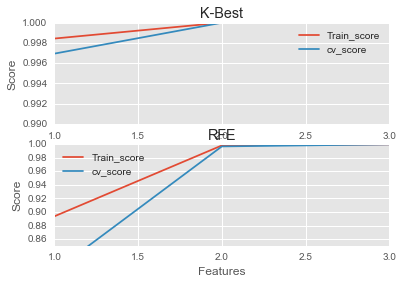

In [127]:
# Subplot2 grid


ax1 = plt.subplot2grid((2,1) , (0,0) ,rowspan = 1 , colspan = 1)
ax1.plot(df_eval_kbest.k , df_eval_kbest.Train_score,label='Train_score')
ax1.plot(df_eval_kbest.k , df_eval_kbest.cv_score,label='cv_score')
ax1.legend(loc='best')
plt.title('K-Best')
plt.ylim([.99,1])
plt.xlim([1,3])
plt.ylabel('Score')


ax2 = plt.subplot2grid((2,1) , (1,0) ,rowspan = 1 , colspan = 1)
ax2.plot(df_eval_RFE.k , df_eval_RFE.Train_score,label='Train_score')
ax2.plot(df_eval_RFE.k , df_eval_RFE.cv_score,label='cv_score')
ax2.legend(loc='best')
plt.title('RFE')
plt.ylim([.85,1])
plt.xlim([1,3])
plt.xlabel('Features')
plt.ylabel('Score')

plt.show()


### Conclusion
- RFE and K best are providing pretty much similar result and converge to a perfect fit when 2 feautes are selected in the model
- This is expected again due to high collinearity and coefficients chosen are (beta_0 = .3,beta_1 = .80,beta_2 = .3,beta_3 = .15)